In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
 data_dir='cell_images'

In [59]:
from matplotlib.image import imread

In [60]:
test_path=data_dir+'/test/'
train_path=data_dir+'/train/'


In [61]:
img=imread(test_path+'Parasitized/'+'C39P4thinF_original_IMG_20150622_114122_cell_4.png')

In [62]:
img.max() # no rescaling needed otherwise devide by 255

0.8901961

In [63]:
dim1=[]
dim2=[]

In [64]:
import os
for image_filename in os.listdir(test_path+'Parasitized'):
    img=imread(test_path+'Parasitized/'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

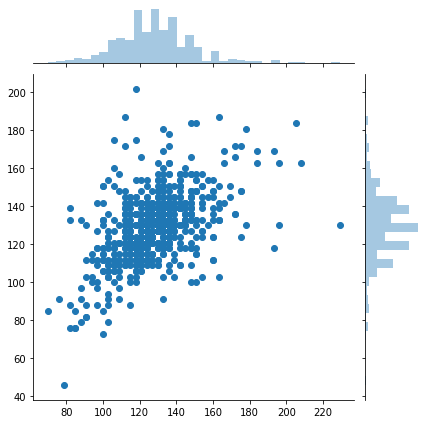

In [65]:
sns.jointplot(dim1,dim2)

In [66]:
np.mean(dim1) # average size

128.18859649122808

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [68]:
image_gen=ImageDataGenerator(
rotation_range=45,width_shift_range=0.2,height_shift_range=0.2,
   shear_range=0.1,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,fill_mode='nearest' 
)

In [78]:
batch_size=16

In [69]:
train_data=image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',
                                        batch_size=batch_size,class_mode='binary')


test_data=image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',
                                        batch_size=batch_size,class_mode='binary',shuffle=False)

Found 26188 images belonging to 2 classes.
Found 1368 images belonging to 2 classes.


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Dropout,Flatten

In [71]:
image_shape=(130,130,3)

In [72]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [73]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [79]:
results=model.fit_generator(train_data,epochs=50,validation_data=test_data,callbacks=[early_stop])

Epoch 1/50
 340/1637 [=====>........................] - ETA: 14:45 - loss: 7.6086 - accuracy: 0.5031

KeyboardInterrupt: 